# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
      
---
* [Custom training](#Custom-training)
    * [GradientTape ](#GradientTape )
        * [context: with](#context- with)
        * [persistent](#persistent)
        * [watch](#watch)
    * [모델 학습](#모델-학습)
    * [학습 루프](#학습-루프)

---
## Custom training


1. tensorflow 사용해서 layer 커스터마이징
  - faster R-CNN
  - 객체지향 : 학습 가능한 레이어 만들기 위한 커스터마이징
    - __init__ 레이어 초기화 
    - build(input_shape): 가중치를 정의, 1번만 실행(self.built = True) 
    - call(x): 레이어의 논리의 핵심
        - build, call 호출
    - compute_output_shape(input_shape)
    - get_config


참고: https://keras.io/ko/layers/writing-your-own-keras-layers/

2. loss/objective func 커스터마이징 
- fit, train_on_batch, train 불가해서 만들어야함
  - 학습 : 실제,예측값 차이의 최소값을 갖도록 gradient descent 최적화 이론 구현 
    - optimizer :gradient descent 1차 미분하여 최소값 찾음
    - 상황마다 다른 gradient 방식 SGD,RMSProp, Adam
> - 책: Julia 실용 최적화 알고리즘(Algorithm for Optimization)

-  pytorch tutorial : Numpy vs pytorch/  tf (자동 미분,최적화,gpu 지원)

- Automatic differntitation in ML: Where we are and where we should be going
 by Google Brain
  - Numpy 비교해서 ML 프레임워크들은 일반성, 유연성을 포기
  - `tf.GradientTape` 자동미분
  - python 속도는 느리지만 간결
  - closure based
  - 미분기능 @tf.function

> - Pytorch Automatic differntitation in PyTorch(2017) by FB
   - **no tape**
   - operator overloading



### constant vs Variable
- 상수 미분 ->0 (기울기 0)

- python 상수의 개념 없음
- tensorflow : Variable, constant
  - immutable
 - 상수(변경 불가)

In [9]:
import tensorflow as tf
a=tf.constant([1,2,3])

In [10]:
a.assign([1,2,3]) 

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

In [11]:
b=tf.Variable([4,5,6])

In [12]:
b.assign([1,2,3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

## tf.GradientTape
- 자동 미분: 후진 방식 자동 미분(reverse mode differentiation)을 사용해 테이프에 "기록된" 연산의 그래디언트를 계산
- context mngt 안에서 실행된 모든 연산 실행된 모든 미분한 결과값 저장(테이프(tape)에 기록)

- 참고 : https://www.tensorflow.org/guide/autodiff?hl=ko#%EA%B7%B8%EB%9E%98%EB%94%94%EC%96%B8%ED%8A%B8_%ED%85%8C%EC%9D%B4%ED%94%84

In [13]:
x=tf.GradientTape
dir(x)  #__enter__, __exit__

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_pop_tape',
 '_push_tape',
 '_tf_api_names',
 '_tf_api_names_v1',
 'batch_jacobian',
 'gradient',
 'jacobian',
 'reset',
 'stop_recording',
 'watch',
 'watched_variables']

## context: with
- `__enter__`,`__exit__` 한 쌍으로 있어야 with **사용 가능**
  - `__enter__` 들어갈때 실행
  - `__exit__`  출력

In [14]:
t=open('a.x','wb') 
dir(t) #__enter__, __exit__

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_checkClosed',
 '_checkReadable',
 '_checkSeekable',
 '_checkWritable',
 '_dealloc_warn',
 '_finalizing',
 'close',
 'closed',
 'detach',
 'fileno',
 'flush',
 'isatty',
 'mode',
 'name',
 'raw',
 'read',
 'read1',
 'readable',
 'readinto',
 'readinto1',
 'readline',
 'readlines',
 'seek',
 'seekable',
 'tell',
 'truncate',
 'writable',
 'write',
 'writelines']

In [15]:
with tf.GradientTape() as t:
''' 미분할 함수'''
  pass

IndentationError: expected an indented block (<ipython-input-15-3d8d462a57ee>, line 2)

In [16]:
with tf.GradientTape() as t: #미분값 저장
  y=2*a  #a=tf.constant(1,2,3)

In [17]:
with tf.GradientTape(persistent=True) as t: #미분값 저장
  y=2*b
  z=y**2

In [18]:
dy_db=t.gradient(y,b)   #y를 b로 미분
dy_db     

In [19]:
dy_db=t.gradient(z,b)   #z를 b로 미분
dy_db     

In [20]:
dy_db=t.gradient(z,y)   #z를 y로 미분 : 식이 아닌 값으로 결과 나옴
dy_db   #상수로 계산함     

- 식/변수가 아닌 값/상수로 결과가 나옴 

In [21]:
y=2*b   #밖
with tf.GradientTape(persistent=True) as t: #미분값 저장
  z=y**2

In [22]:
dy_db=t.gradient(z,b)  #z를 b로 미분
dy_db                  #Noen : with 내부에 계산해야함

1. tf 기본 dtype = 'float32'기반
2. `tf.Variable` 만 가능
3. with구문 내에서 1번만 실행 가능 (non-persistent)
  - 비슷한 예. iterator, generator 메모리 번지 초과하면 에러 
  
### gradient
- gradient 계산
- $\frac {dy}{dx}$: y함수를 x로 미분

constant 미분

In [23]:
dy_da=t.gradient(y,a)  #한번만 실행

In [24]:
dy_da  # Out 없음

In [25]:
dy_da=t.gradient(y,a)  # non-persistent tapes

Variable 미분

In [26]:
with tf.GradientTape() as t: #미분값 저장
  y=2*b  #b=tf.Variable(1,2,3)

In [27]:
dy_db=t.gradient(y,b)  #한번만 실행 non-persistent

In [28]:
dy_db  # Out 없음

In [29]:
dy_db=t.gradient(y,b) 

RuntimeError: GradientTape.gradient can only be called once on non-persistent tapes.

In [33]:
b=tf.Variable([1.,2,3]) #homogeneous -> type casting

In [34]:
with tf.GradientTape() as t: #미분값 저장
  y=2*b 

In [35]:
dy_db=t.gradient(y,b)  #한번만 실행 non-persistent
dy_db #결과값 나옴 

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 2., 2.], dtype=float32)>

### watch 
`GradientTape.watch(constant)`
- 상수 사용 가능

In [36]:
#1. 상수 가능 
a=tf.constant([1.0,2,3])

with tf.GradientTape() as t:
  t.watch(a)
  y=2*a

In [37]:
dy_da=t.gradient(y,a)  
dy_da     #가능.

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 2., 2.], dtype=float32)>

### persistent
`tf.GradientTape(persistent=True)`
- 동일한 연산에 대해  2번 이상 사용 가능(gradient() 메서드의 다중 호출을 허용)

In [38]:
#2. 2번 이상 사용 가능  
with tf.GradientTape(persistent=True) as t: 
  t.watch(a)
  y=2*a

In [39]:
dy_da=t.gradient(y,a)  
dy_da     #가능

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 2., 2.], dtype=float32)>

In [40]:
dy_da=t.gradient(y,a)  
dy_da     # 여러번 가능

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 2., 2.], dtype=float32)>

- watched_accesible_ :trainable paramters 입력 들어오면 누적해서 추적 되는지 안되는 지체크.

### 제어
- 연산이 실행되는 순서대로 테이프에 기록되기 때문에 제어 가눙
- if while, for문 

In [41]:
a=0
with tf.GradientTape(persistent=True) as t: 
  if a==0:
    
    y=2*b #밖에 두면 안됨
    z=y**2

In [42]:
dy_db=t.gradient(z,b)  #z를 b로 미분
dy_db      #Noen 

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 8., 16., 24.], dtype=float32)>

TensorFlow에서 제공하는 기능
- Numpy 기반 사용하지 않음
- tensorflow + pandas
    - tensorflow 모델에 pandas 데이터 넣기 가능
- scikit-learn + keras 
    - GPU 사용 가능하도록

In [43]:
import numpy as np
c=np.array([1.,2,3])

In [44]:
with tf.GradientTape(persistent=True) as t: 
  y=2*c

In [45]:
dy_dc=t.gradient(y,c)  #Numpy ndarray 불가
dy_dc     

AttributeError: 'numpy.ndarray' object has no attribute '_id'

## Custom training

[맞춤 학습](https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough?hl=ko)
- 어떤 함수가 들어와도 미분 가능
- 처음부터 만들지 않고 다양한 실험 할 수 있도록 다양한 체크포인트를 둠.


### tf.data.Dataset 생성
- TensorFlow Dataset로  tensor 로 바꿔야함
    - tensorflow 에만 의존
    - 고급기능 이용 가능
>- Numpy기반을 바로 GPU호환 가능해지도록 시도

In [46]:
import seaborn as sns
from sklearn import datasets
iris=sns.load_dataset('iris')#pandas

In [47]:
tf.data.Dataset.from_generator      
tf.data.Dataset.from_tensor_slices #넘파이 포맷 받을 수 있음 
tf.data.Dataset.from_tensors

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.from_tensors(tensors)>

In [48]:
iris.iloc[:,:-1].values #넘파이

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [49]:
tf.data.Dataset.from_tensor_slices(iris.iloc[:,:-1].values) #텐서 (,4) input_shape

<TensorSliceDataset shapes: (4,), types: tf.float64>

In [50]:
tf.data.Dataset.from_tensors(iris.iloc[:,:-1].values)      #텐서 (150,4)

<TensorDataset shapes: (150, 4), types: tf.float64>

In [51]:
dir(iris) #__iter__ -> iterable -> iter()

['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__re

In [52]:
iter(iris)

generator 만드는 방식 두가지 comprehension , yield

In [53]:
tf.data.Dataset.from_generator( iter(iris), (tf.float32,tf.float32)) 

TypeError: `generator` must be callable.

In [54]:
#generator 
def x():
  yield 1
  yield 2

In [55]:
x() #callable

<generator object x at 0x7ff34ea79150>

In [56]:
def gen():
  for i in iris.iterrows(): 
    yield i 

In [57]:
x= gen() #x callable 

In [58]:
next(x) # 0th row

(0,
 sepal_length       5.1
 sepal_width        3.5
 petal_length       1.4
 petal_width        0.2
 species         setosa
 Name: 0, dtype: object)

In [59]:
tf.data.Dataset.from_generator( gen, (tf.float32,tf.float32))

<FlatMapDataset shapes: (<unknown>, <unknown>), types: (tf.float32, tf.float32)>

### 모델 학습
- fit, train_on_batch
    - callbacks 
    - multi-inputs, outputs 인 복잡한 모델에는  loss function 커스터마이징 하면 적용 불가한 경우가 많음.
    - eg. style transfer


- tf.GradientTape
    - 동적 사용 
    - tensorflow 에만 의존
    - 고급기능 이용

In [170]:
# Sequential model
model=tf.keras.models.Sequential([
                              tf.keras.layers.Dense(10,activation='relu',
                                                    input_shape=(4,)),
                              tf.keras.layers.Dense(10,activation='relu'),
                              tf.keras.layers.Dense(3,activation='softmax')


]) 

In [171]:
# 컴파일 학습 전략 - loss, optimizer, metrics 형태 고정
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam')

In [63]:
#label encoding 
iris.species= iris.species.map({'setosa':0, 'versicolor':1,'virginica':2})

In [65]:
model.fit(iris.iloc[:,:-1],iris.species,epochs=5)#pandas 연동 문제 없음

Epoch 1/5
5/5 [==============================] - 0s 2ms/step - loss: 1.6079
Epoch 2/5
5/5 [==============================] - 0s 3ms/step - loss: 1.4893
Epoch 3/5
5/5 [==============================] - 0s 4ms/step - loss: 1.3869
Epoch 4/5
5/5 [==============================] - 0s 4ms/step - loss: 1.3119
Epoch 5/5
5/5 [==============================] - 0s 3ms/step - loss: 1.2396


train_on_batch
- 한번 실행 시 singe batch size만큼 학습
- fit > train_on_batch
- for 돌리면 epochs 처럼 돌리기 가능
    - if 제어 가능
    -  값 변화 관찰 가능

In [66]:
model.train_on_batch(iris.iloc[:,:-1],iris.species) 
#1 epoch 

1.2233163118362427

In [67]:
for i in range(10): # 10번 학습
  print(model.train_on_batch(iris.iloc[:,:-1],iris.species))

1.1968495845794678
1.1870957612991333
1.1778061389923096
1.1689541339874268
1.160499930381775
1.1524028778076172
1.1446696519851685
1.1372160911560059
1.130065679550171
1.1231932640075684


In [68]:
dir(model) #weights, outputs...변화값 확인

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_cast_single_input',
 '_check_call_args',
 '_checkpoint_dependencies',
 '_clear_los

In [69]:
model.loss

'sparse_categorical_crossentropy'

In [70]:
model.optimizer

In [71]:
model.layers[0]

In [ ]:
model.fit(iris.iloc[:,:-1],iris.species,epochs=5,
          class_weight=) #balancing imbalanced dataset (class 비율 맞춰줌)

In [73]:
a=tf.Variable([1.,2,3])

with tf.GradientTape() as t:
  y=a**2+ 2*a

In [74]:
dy_da=t.gradient(y,a) #y를 a로 미분
dy_da

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([4., 6., 8.], dtype=float32)>

- optimizer: Gradient descent 방법
- loss: 학습 통해서 실제값,예측값 최소화 하는 weight(kernel, bias)구함

In [75]:
optimizer=tf.keras.optimizers.Adam() #아담 방식으로 gradient descent

In [76]:
optimizer.apply_gradients(zip(dy_da,a )) #인자 넣기  zip(grads, vars)쌍으로 묶음
#너무 단순해서 에러

TypeError: zip argument #2 must support iteration

In [77]:
#loss function: 들어온 데이터와 라벨 미분해서 weight(trainable, non-trainable) 찾기
loss= tf.keras.losses.SparseCategoricalCrossentropy()

In [78]:
loss()  #y_true, y_pred 차이 최소화

TypeError: __call__() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [90]:
X_train =iris.iloc[:,:-1].values
y_train=iris.species.values

In [91]:
with tf.GradientTape() as t:     #실제값 예측값 최소화하도록 weights업데이트
  prediction=model(X_train)      #함수형 패러다임
  loss_=loss(y_train,prediction) # y - y pred 차이

In [92]:
#예측 1.함수형 패러다임
model(iris.iloc[0,:-1].values[tf.newaxis]) # 예측 None ,4 

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.46650478, 0.290364  , 0.24313122]], dtype=float32)>

In [93]:
#예측 2.predict
model.predict(iris.iloc[0,:-1].values[tf.newaxis])

array([[0.46650478, 0.290364  , 0.24313122]], dtype=float32)

In [94]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[-0.01900361, -0.24364588, -0.58017933, -0.5348375 ,  0.23457456,
         -0.23569003,  0.52564144, -0.48051593,  0.23258501,  0.15003553],
        [ 0.28455558, -0.23491871, -0.45981246, -0.03237897, -0.64529395,
          0.08287691, -0.2812763 ,  0.00629133,  0.17521326, -0.07410487],
        [-0.5915796 , -0.3868398 , -0.492257  , -0.04173607, -0.48896572,
          0.39589074,  0.06782979, -0.01372755,  0.5928901 ,  0.3289041 ],
        [-0.33393905,  0.13455153,  0.4236977 , -0.3942173 ,  0.46376133,
          0.14254622, -0.63554263, -0.4745745 , -0.33886155,  0.02280677]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.05550224,  0.        ,  0.        ,  0.        ,  0.        ,
         0.0601943 , -0.02363754,  0.        , -0.03292561, -0.0288935 ],
       dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 10) dtype=float32, numpy=
 array([

In [95]:
model.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[-0.01900361, -0.24364588, -0.58017933, -0.5348375 ,  0.23457456,
         -0.23569003,  0.52564144, -0.48051593,  0.23258501,  0.15003553],
        [ 0.28455558, -0.23491871, -0.45981246, -0.03237897, -0.64529395,
          0.08287691, -0.2812763 ,  0.00629133,  0.17521326, -0.07410487],
        [-0.5915796 , -0.3868398 , -0.492257  , -0.04173607, -0.48896572,
          0.39589074,  0.06782979, -0.01372755,  0.5928901 ,  0.3289041 ],
        [-0.33393905,  0.13455153,  0.4236977 , -0.3942173 ,  0.46376133,
          0.14254622, -0.63554263, -0.4745745 , -0.33886155,  0.02280677]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.05550224,  0.        ,  0.        ,  0.        ,  0.        ,
         0.0601943 , -0.02363754,  0.        , -0.03292561, -0.0288935 ],
       dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 10) dtype=float32, numpy=
 array([

In [96]:
model.trainable_weights

[<tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[-0.01900361, -0.24364588, -0.58017933, -0.5348375 ,  0.23457456,
         -0.23569003,  0.52564144, -0.48051593,  0.23258501,  0.15003553],
        [ 0.28455558, -0.23491871, -0.45981246, -0.03237897, -0.64529395,
          0.08287691, -0.2812763 ,  0.00629133,  0.17521326, -0.07410487],
        [-0.5915796 , -0.3868398 , -0.492257  , -0.04173607, -0.48896572,
          0.39589074,  0.06782979, -0.01372755,  0.5928901 ,  0.3289041 ],
        [-0.33393905,  0.13455153,  0.4236977 , -0.3942173 ,  0.46376133,
          0.14254622, -0.63554263, -0.4745745 , -0.33886155,  0.02280677]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.05550224,  0.        ,  0.        ,  0.        ,  0.        ,
         0.0601943 , -0.02363754,  0.        , -0.03292561, -0.0288935 ],
       dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 10) dtype=float32, numpy=
 array([

- 관례상 학습에서는 trainable_variables 변수 사용

In [97]:
model.trainable_variables is model.trainable_weights #다른 객체로 만들어짐 

False

In [98]:
model.trainable_variables == model.trainable_weights #동일한 값 

True

In [99]:
grad=t.gradient(loss_, model.trainable_variables)

In [100]:
optimizer.apply_gradients(zip(grad, model.trainable_variables)) #너무 작아서임 ?

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

- 함수형 패러다임 : calll 객체 인스턴스 () 
- compile, fit 수동으로 함수로 만듦
    - 똑같은 값으로 gradient 안함
    - train할때마다 loss,정확도 값 계산

In [101]:
#accuracy 변하는 정도 
train_loss= tf.keras.metrics.Mean()
train_acc=tf.keras.metrics.SparseCategoricalAccuracy()

In [102]:
def train(X_train,y_train):
        #함수형 패러다임

    with tf.GradientTape() as t: 
        prediction=model(X_train)
        loss_=loss(y_train,prediction) 
        
    grad=t.gradient(loss_, model.trainable_variables)
    optimizer.apply_gradients(zip(grad, model.trainable_variables))
    
    train_loss(loss_)
    train_acc(y_train, prediction)

In [103]:
@tf.function   #decorator: 넘파이를 텐서에 쓰는 함수로 변경해서 효율적으로 사용할 수 있도록 함 

def train(X_train,y_train):
  with tf.GradientTape() as t:  #실제값 예측값 최소화하도록 weights업데이트
    prediction=model(X_train)
    loss_=loss(y_train,prediction) # y - y pred 차이
  grad=t.gradient(loss_, model.trainable_variables)
  optimizer.apply_gradients(zip(grad, model.trainable_variables))
  #  optimizer.apply_gradients([grad, model.trainable_variables])
  train_loss(loss_)
  train_acc(y_train, prediction)

### 학습 루프
- epochs= for 

In [104]:
for i in range(10):  #10 epochs
  train(X_train,y_train)
  print(i+1, train_acc.result()) # 학습 결과 출력

1 tf.Tensor(0.34666666, shape=(), dtype=float32)
2 tf.Tensor(0.35333332, shape=(), dtype=float32)
3 tf.Tensor(0.36, shape=(), dtype=float32)
4 tf.Tensor(0.37333333, shape=(), dtype=float32)
5 tf.Tensor(0.388, shape=(), dtype=float32)
6 tf.Tensor(0.3988889, shape=(), dtype=float32)
7 tf.Tensor(0.40952381, shape=(), dtype=float32)
8 tf.Tensor(0.41916665, shape=(), dtype=float32)
9 tf.Tensor(0.42814815, shape=(), dtype=float32)
10 tf.Tensor(0.436, shape=(), dtype=float32)


In [105]:
train_acc.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.436>

In [106]:
# trainable_weights 
@tf.function   #decorator: 넘파이를 텐서로 변경해서 효율적으로 사용할수있도록 함 
  #함수형 패러다임
def train(X_train,y_train):
  with tf.GradientTape() as t:  #실제값 예측값 최소화하도록 weights업데이트
    prediction=model(X_train)
    loss_=loss(y_train,prediction) # y - y pred 차이
 #모델 최적화
  grad=t.gradient(loss_, model.trainable_weights)
  optimizer.apply_gradients(zip(grad, model.trainable_weights))
    
  train_loss(loss_)

  train_acc(y_train, prediction)

In [107]:
for i in range(10):
  train(X_train,y_train)
  print(i+1, train_acc.result()) 

1 tf.Tensor(0.4430303, shape=(), dtype=float32)
2 tf.Tensor(0.45055556, shape=(), dtype=float32)
3 tf.Tensor(0.45948717, shape=(), dtype=float32)
4 tf.Tensor(0.46761906, shape=(), dtype=float32)
5 tf.Tensor(0.47555557, shape=(), dtype=float32)
6 tf.Tensor(0.48416665, shape=(), dtype=float32)
7 tf.Tensor(0.49333334, shape=(), dtype=float32)
8 tf.Tensor(0.50185186, shape=(), dtype=float32)
9 tf.Tensor(0.5094737, shape=(), dtype=float32)
10 tf.Tensor(0.51633334, shape=(), dtype=float32)


- 원하는 결과에 따라서 다양한 그래프 만듦

In [172]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

@tf.function   #decorator: 넘파이를 텐서에 쓰는 함수로 변경해서 효율적으로 사용할 수 있도록 함 

def train(X_train,y_train):
  with tf.GradientTape() as t:  #실제값 예측값 최소화하도록 weights업데이트
    prediction=model(X_train)
    loss_=loss(y_train,prediction) # y - y pred 차이
  grad=t.gradient(loss_, model.trainable_variables)
  optimizer.apply_gradients(zip(grad, model.trainable_variables))
  #optimizer.apply_gradients([grad, model.trainable_variables])
  train_loss(loss_)
  train_acc(y_train, prediction)

In [173]:
train_loss_results = []
train_accuracy_results = []

In [176]:
#여러번 실행할수록 성능이 좋아짐
for i in range(50):
  train(X_train,y_train)
  train_loss_results.append(train_loss.result())
  train_accuracy_results.append(train_acc.result())
  print(i+1, train_acc.result()) 

1 tf.Tensor(0.8720379, shape=(), dtype=float32)
2 tf.Tensor(0.87251574, shape=(), dtype=float32)
3 tf.Tensor(0.87298906, shape=(), dtype=float32)
4 tf.Tensor(0.8734891, shape=(), dtype=float32)
5 tf.Tensor(0.8739845, shape=(), dtype=float32)
6 tf.Tensor(0.8744753, shape=(), dtype=float32)
7 tf.Tensor(0.8749616, shape=(), dtype=float32)
8 tf.Tensor(0.8754434, shape=(), dtype=float32)
9 tf.Tensor(0.87589043, shape=(), dtype=float32)
10 tf.Tensor(0.87633336, shape=(), dtype=float32)
11 tf.Tensor(0.8768024, shape=(), dtype=float32)
12 tf.Tensor(0.87726724, shape=(), dtype=float32)
13 tf.Tensor(0.87775785, shape=(), dtype=float32)
14 tf.Tensor(0.87824404, shape=(), dtype=float32)
15 tf.Tensor(0.8786963, shape=(), dtype=float32)
16 tf.Tensor(0.87911505, shape=(), dtype=float32)
17 tf.Tensor(0.87953013, shape=(), dtype=float32)
18 tf.Tensor(0.8799708, shape=(), dtype=float32)
19 tf.Tensor(0.88043666, shape=(), dtype=float32)
20 tf.Tensor(0.88089854, shape=(), dtype=float32)
21 tf.Tensor(0.881

In [168]:
import numpy as np

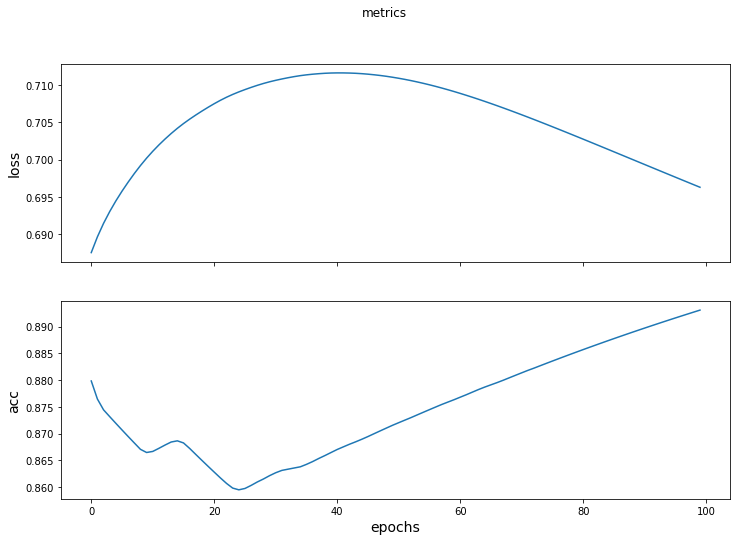

In [177]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('metrics')

axes[0].set_ylabel("loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("acc", fontsize=14)
axes[1].set_xlabel("epochs", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

### 예측

In [159]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = [ 'setosa','versicolor','virginica'][class_idx]
  print("샘플 {} 예측: {} ({:4.1f}%)".format(i, name, 100*p))

샘플 0 예측: setosa (57.4%)
샘플 1 예측: versicolor (55.6%)
샘플 2 예측: virginica (55.2%)
